In [1]:
from load_dataset import *

data = load_diffusion_data(input_dir="data",file_name="valv9.json")

Loaded 18608 records from data/valv9.json


[[-1.3243833780288696, -0.9479379057884216, 0.05687294900417328], [0.32566604018211365, 0.9103389382362366, -0.523749589920044], [-1.38998281955719, -0.9145170450210571, 0.04643053188920021], [-1.0462185144424438, 0.9894763827323914, -0.5484762787818909], [1.6917665004730225, 1.089860200881958, -0.5798414349555969], [-1.1142394542694092, 0.12739507853984833, -0.2791171371936798], [0.3983113169670105, -0.7646333575248718, -0.00040094670839607716], [-1.1931333541870117, -0.10657405108213425, -0.20601297914981842], [-0.32735252380371094, 1.2363804578781128, -0.6256219744682312], [-1.0817798376083374, 0.7076578736305237, -0.46042147278785706], [-0.09660004079341888, -1.2755218744277954, 0.15922726690769196], [1.3705840110778809, 1.4054832458496094, -0.6784585118293762], [1.1717991828918457, 0.38645321130752563, -0.3600603938102722], [1.5943186283111572, 0.596189558506012, -0.42559298872947693], [-0.5453105568885803, -0.30448153614997864, -0.14417637884616852], [0.19883288443088531, -0.5778

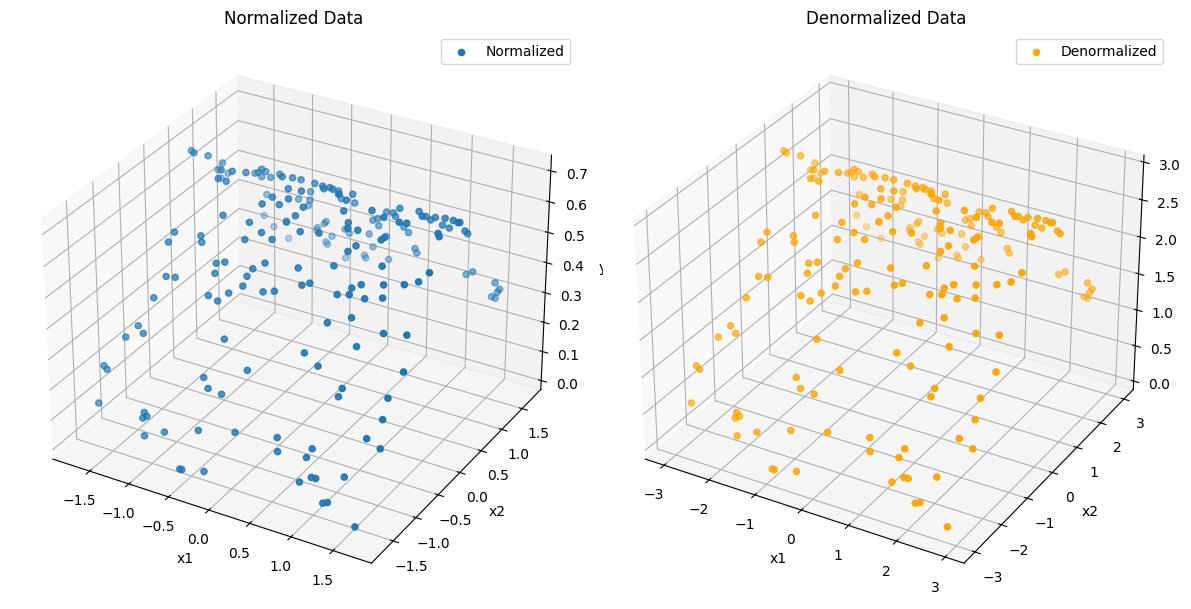

In [17]:
import pickle
from mpl_toolkits.mplot3d import Axes3D

print(data[0]["X_Y_combined"])

def denormalize(data):
    with open('data/normalization_params.pkl', 'rb') as f:
        normalization_params = pickle.load(f)
    x_mean = normalization_params['x_mean']
    x_std = normalization_params['x_std']
    y_mean = normalization_params['y_mean']
    y_std = normalization_params['y_std']

    print(f"Global X Mean: {x_mean}, X Std: {x_std}")
    print(f"Global Y Mean: {y_mean}, Y Std: {y_std}")
    denormed_data = []
    for entry in data:
        denormed_entry = entry.copy()
        denormed_XY = []
        for row in entry["X_Y_combined"]:
            x1 = row[0] * x_std + x_mean
            x2 = row[1] * x_std + x_mean
            y = row[2] * y_std + y_mean
            denormed_XY.append([x1, x2, y])
        denormed_entry["X_Y_combined"] = denormed_XY
        denormed_data.append(denormed_entry)
    return denormed_data
            
            
denormed_data = denormalize(data)

print(denormed_data[0]["X_Y_combined"])


# Extract x1, x2, y from normalized and denormalized data
x1_norm = [row[0] for row in data[2]["X_Y_combined"]]
x2_norm = [row[1] for row in data[2]["X_Y_combined"]]
y_norm = [row[2] for row in data[2]["X_Y_combined"]]

x1_denorm = [row[0] for row in denormed_data[2]["X_Y_combined"]]
x2_denorm = [row[1] for row in denormed_data[2]["X_Y_combined"]]
y_denorm = [row[2] for row in denormed_data[2]["X_Y_combined"]]

fig = plt.figure(figsize=(12, 6))

# Normalized
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(x1_norm, x2_norm, y_norm, label='Normalized')
ax1.set_title('Normalized Data')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.legend()

# Denormalized
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x1_denorm, x2_denorm, y_denorm, label='Denormalized', color='orange')
ax2.set_title('Denormalized Data')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.legend()

plt.tight_layout()
plt.show()
